<a href="https://colab.research.google.com/github/sivasan2022/House_price_prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOUSE_PRICE_PREDICTION USING LINEAR REGRESSION

Importing necessary libraries

In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
#importing dataset
dataset=pd.read_csv("data.csv")
space=dataset['sqft_living']
price=dataset['price']

Splitting labels and keys

In [ ]:
#splitting labels and keys
x=np.array(space).reshape(-1,1)
y=np.array(price)

Splitting the dataset for training and testing

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=0)

Building a regression model

In [ ]:
#splitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
pred=regressor.predict(xtest)

Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(ytest, pred)
r2 = r2_score(ytest, pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 519177498961.8896
R-squared: 0.09135494025388557


Visualizing the model

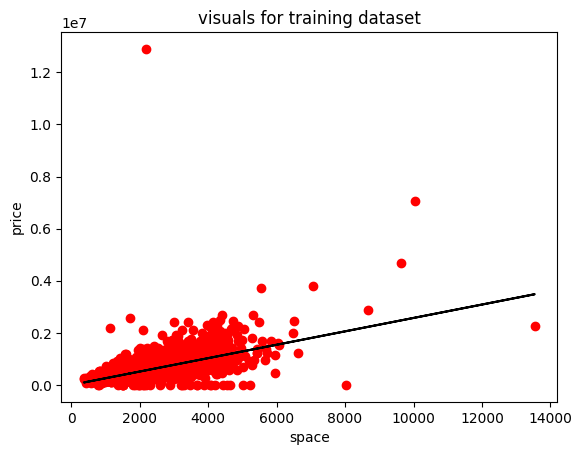

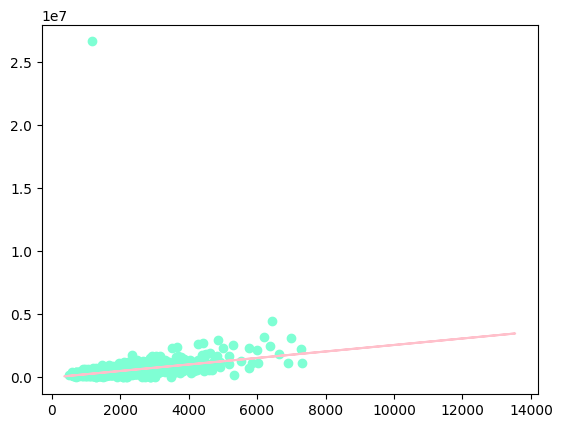

In [ ]:
#Scatter plot for training data
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,regressor.predict(xtrain),color='black')
plt.title("visuals for training dataset")
plt.xlabel("space")
plt.ylabel('price')
plt.show()

plt.scatter(xtest,ytest,color='aquamarine')
plt.plot(xtrain,regressor.predict(xtrain),color='pink')

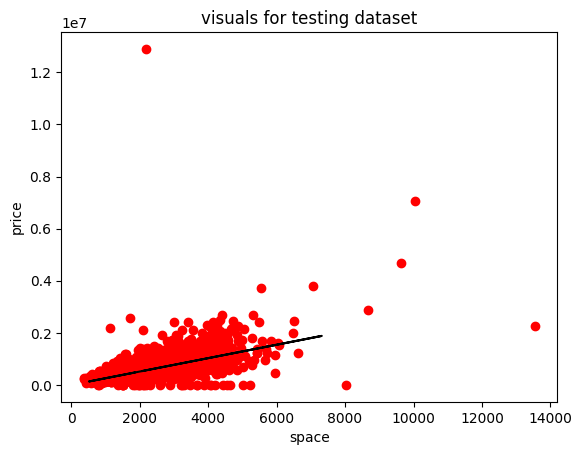

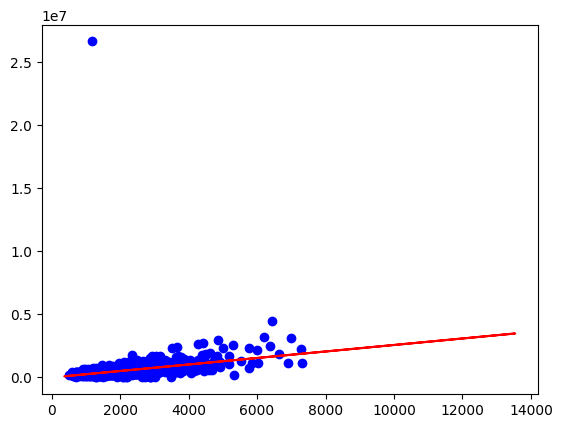

In [ ]:
#Scatterplot for testing data
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtest,regressor.predict(xtest),color='black')
plt.title("visuals for testing dataset")
plt.xlabel("space")
plt.ylabel('price')
plt.show()

plt.scatter(xtest,ytest,color='blue')
plt.plot(xtrain,regressor.predict(xtrain),color='red')

Data preprocessing to improve the model

In [ ]:
#data preprocessing using label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
normalized_data=dataset.apply(LabelEncoder().fit_transform)
normalized_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,402,3,4,93,1399,1,0,0,2,96,0,55,50,1522,36,62,0
1,0,1719,5,8,406,1701,2,0,4,4,373,29,21,0,3899,35,58,0
2,0,487,3,6,180,2196,0,0,0,3,182,0,66,0,2291,18,26,0
3,0,706,3,7,191,1439,0,0,0,3,52,109,63,0,4263,3,7,0
4,0,998,4,8,181,2026,0,0,0,3,70,85,76,37,4352,31,31,0


In [ ]:
x1=normalized_data.iloc[:,:-2]
x1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,0,402,3,4,93,1399,1,0,0,2,96,0,55,50,1522,36
1,0,1719,5,8,406,1701,2,0,4,4,373,29,21,0,3899,35
2,0,487,3,6,180,2196,0,0,0,3,182,0,66,0,2291,18
3,0,706,3,7,191,1439,0,0,0,3,52,109,63,0,4263,3
4,0,998,4,8,181,2026,0,0,0,3,70,85,76,37,4352,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,68,384,3,5,124,1000,0,0,0,3,126,0,54,24,3447,35
4596,68,961,3,8,115,1306,2,0,0,2,118,0,83,54,960,3
4597,68,695,3,8,333,1140,2,0,0,2,333,0,109,0,4033,32
4598,69,110,4,6,207,1055,0,0,0,2,60,111,74,0,3498,35


In [ ]:
y1=normalized_data.iloc[:,-2]
y1

0       62
1       58
2       26
3        7
4       31
        ..
4595    62
4596     6
4597    37
4598    71
4599    26
Name: statezip, Length: 4600, dtype: int64

Splitting the dataset

In [ ]:
#splitting dataset for testing and training
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2)

Building new model

In [ ]:
model = LinearRegression()
# Train the model on the training data
model.fit(x1train, y1train)

# Make predictions on the test data
y1_pred = model.predict(x1test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y1test, y1_pred)
r2 = r2_score(y1test, y1_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 183.8548277364773
R-squared: 0.5568541841294014


Mean squared error decreased from 519177498961.8896 to 183.8548277364773